In [55]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('Zoo.csv')

In [6]:
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='type', ylabel='Count'>

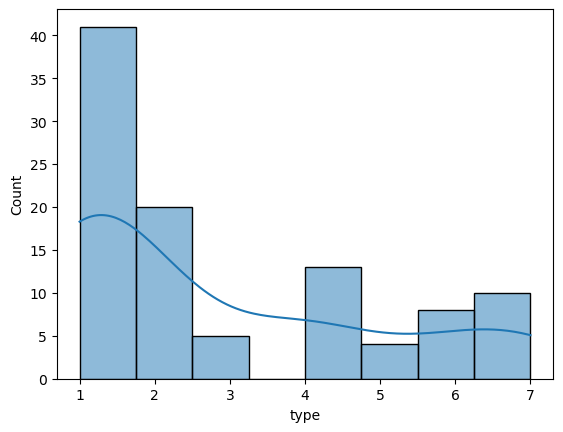

In [8]:
sns.histplot(df['type'],kde=True)

<Axes: >

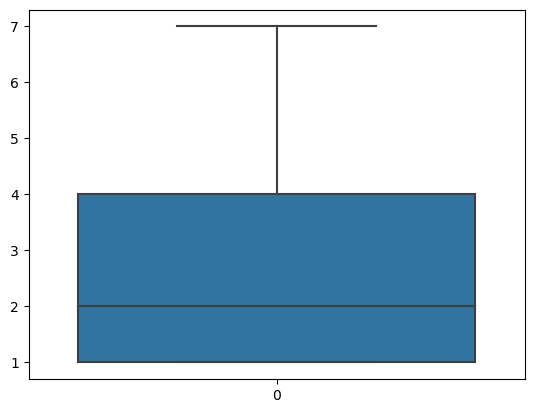

In [9]:
sns.boxplot(df['type'])

<Axes: xlabel='legs', ylabel='Count'>

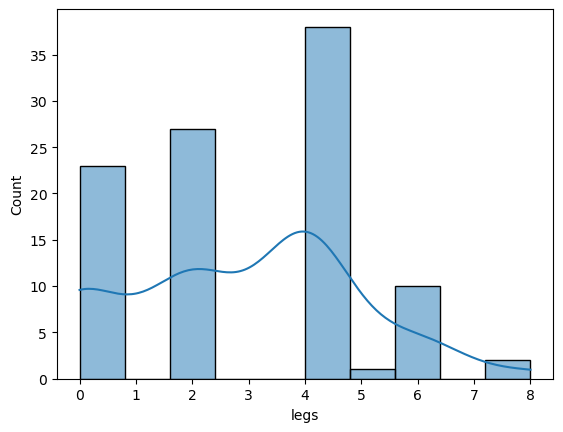

In [10]:
sns.histplot(df['legs'],kde=True)

<Axes: >

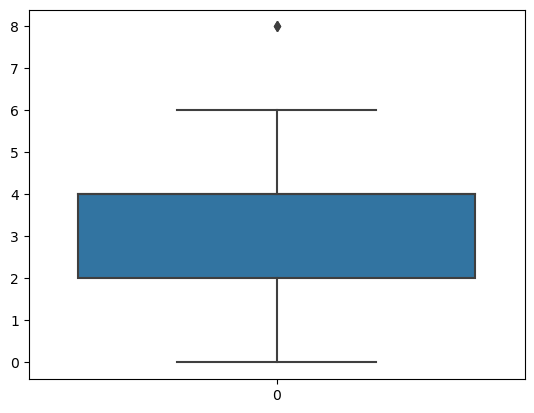

In [11]:
sns.boxplot(df['legs'])

In [14]:
from sklearn.model_selection import KFold

In [17]:
from sklearn.model_selection import cross_val_score

In [19]:
df=df.drop(columns=['animal name'])

In [20]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [21]:
X=df.drop(columns=['type'])
Y=df['type']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [23]:
kfold=KFold(n_splits=10)

In [24]:
model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')

In [25]:
model.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [41]:
y_pred=model.predict(x_test)

In [35]:
y_pred

array([1, 2, 1, 4, 1, 1, 1, 7, 1, 4, 1, 7, 1, 1, 2, 4, 2, 2, 2, 4, 1, 4,
       4, 2, 4, 4, 4, 5, 1, 2, 4, 4, 2, 1, 2, 6, 6, 2, 1, 2, 1, 5, 1, 1,
       7, 6, 4, 2, 6, 6, 4, 6, 1, 1, 5, 4, 1, 1, 2, 2, 4, 5, 7, 2, 2, 1,
       7, 6, 6, 4, 7, 1, 4, 1, 1, 1, 2, 1, 1, 2], dtype=int64)

In [36]:
result=cross_val_score(model,X,Y,cv=kfold)

In [37]:
result

array([1. , 0.7, 0.8, 1. , 0.9, 0.9, 0.8, 0.5, 0.9, 0.9])

In [38]:
from sklearn.metrics import accuracy_score,classification_report

In [56]:
k_score=[]
for k in range(1,30):
    model=KNeighborsClassifier(n_neighbors=k)
    result=cross_val_score(model,X,Y,cv=10)
    k_score.append(result.mean())
    

In [61]:
df['accuracy']=pd.DataFrame(k_score)

In [62]:
df['accuracy']

0     0.980000
1     0.940000
2     0.950000
3     0.920000
4     0.880909
5     0.870909
6     0.841818
7     0.811818
8     0.781818
9     0.781818
10    0.781818
11    0.781818
12    0.781818
13    0.781818
14    0.781818
15    0.781818
16    0.781818
17    0.781818
18    0.781818
19    0.781818
20    0.781818
21    0.781818
22    0.771818
23    0.741818
24    0.721818
25    0.702727
26    0.702727
27    0.702727
28    0.702727
Name: accuracy, dtype: float64

In [59]:
df['no_neighbores']=range(1,30)

In [60]:
df['no_neighbores']

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
Name: no_neighbores, dtype: int64

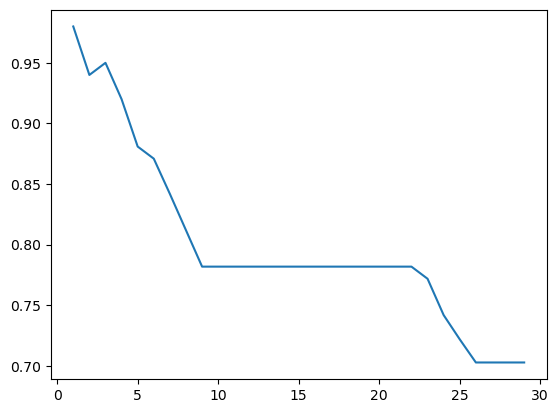

In [64]:
plt.plot(df['no_neighbores'],df['accuracy'])

In [65]:
classification_report=classification_report(y_test,y_pred)

In [66]:
classification_report

'              precision    recall  f1-score   support\n\n           1       0.92      0.92      0.92        12\n           2       1.00      1.00      1.00         2\n           3       0.00      0.00      0.00         2\n           4       0.50      1.00      0.67         2\n           5       0.00      0.00      0.00         0\n           6       0.50      1.00      0.67         1\n           7       0.00      0.00      0.00         2\n\n    accuracy                           0.76        21\n   macro avg       0.42      0.56      0.46        21\nweighted avg       0.69      0.76      0.71        21\n'

In [67]:
## WE USE PARAMETERS LIKE METRICS,N_SPLITS,N_NEIGHBORES,ALGORITHUM,WEIGHTS

In [68]:
# WE USE EUCLIDEAN METRICS ,COSINE AIMILARITY